In [6]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

In [7]:
df=pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


2. High Level Data Understanding:


a. Find no. of rows & columns in the dataset 

b. Data types of columns. 

c. Info & describe of data in dataframe.

In [8]:
# a. Find no. of rows & columns in the dataset
num_rows,num_columns=df.shape
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows:57394
Number of columns:49


In [9]:
# b. Data types of columns
data_types=df.dtypes
print("\nData types of columns:")
print(data_types)


Data types of columns:
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu

In [10]:
# c. Info & describe of data in the dataframe
print("\nInfo of the dataframe:")
print(df.info())


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_mil

3.Low Level Data Understanding :

In [11]:
# a. Find count of unique values in the location column
unique_locations_count=df['location'].nunique()
print(f"Count of unique values in the 'location'column:{unique_locations_count}")

Count of unique values in the 'location'column:216


In [12]:
# b.Find which continent has the maximum frequency using value counts
max_continent_frequency=df['continent'].value_counts().idxmax()
print(f"Continent with maximum frequency:{max_continent_frequency}")

Continent with maximum frequency:Europe


In [13]:
#c. Find maximum & mean value in 'total_cases'
max_total_cases=df['total_cases'].max()
mean_total_cases=df['total_cases'].mean()
print("max_total_cases:",max_total_cases)
print("mean_total_cases",mean_total_cases)

max_total_cases: 55154651.0
mean_total_cases 167797.3688753302


In [14]:
# d.Find 25%, 50%, and 75% quartile values in 'total_deaths'
quartiles_total_deaths=df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(quartiles_total_deaths)

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [15]:
# e. Find which continent has the maximum 'human_development_index'
max_hdi_continent=df.loc[df['human_development_index'].idxmax(),'continent']
print(f"Continent with maximum 'human_development_index':{max_hdi_continent}")

Continent with maximum 'human_development_index':Europe


In [16]:
# f. Find which continent has the minimum 'gdp_per_capita'
min_gdp_continent=df.loc[df['gdp_per_capita'].idxmin(),'continent']
print(f"Continent with minimum 'gdp_per_capita':{min_gdp_continent}")

Continent with minimum 'gdp_per_capita':Africa


#4. Filter the dataframe with only this columns 

['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'] and update the data frame.

In [17]:
selected_columns=['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
filter_columns=df[selected_columns]
df=filter_columns
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


5. Data Cleaning 

a. Remove all duplicates observations 

b. Find missing values in all columns 

c. Remove all observations where continent column value is missing Tip : using subset parameter in dropna 

d. Fill all missing values with 0

In [18]:
# a. Remove all duplicate observations
df = df.drop_duplicates()
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [19]:
# b. Find missing values in all columns
missing_values= df.isnull().sum()
print(missing_values)

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [20]:
#c.Remove all observations where the continent column value is missing
df=df.dropna(subset=['continent'])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [21]:
# d. Fill all missing values with 0
df = df.fillna(0)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [22]:
# Displaying the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

Cleaned DataFrame:
  continent     location      date  total_cases  total_deaths  gdp_per_capita  \
0      Asia  Afghanistan  31/12/19          0.0           0.0        1803.987   
1      Asia  Afghanistan  01/01/20          0.0           0.0        1803.987   
2      Asia  Afghanistan  02/01/20          0.0           0.0        1803.987   
3      Asia  Afghanistan  03/01/20          0.0           0.0        1803.987   
4      Asia  Afghanistan  04/01/20          0.0           0.0        1803.987   

   human_development_index  
0                    0.498  
1                    0.498  
2                    0.498  
3                    0.498  
4                    0.498  


6. Date time format : 
    
a.Convert date column in datetime format using pandas.to_datetime

b.Create new column month after extracting month data from date column.

In [23]:
# a. Convert date column to datetime format using pandas.to_datetime
df['date'] = pd.to_datetime(df['date'])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


In [24]:
#b.Create a new column 'month' after extracting month data from the date column
df['month'] = df['date'].dt.month
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


In [25]:
# Displaying the first few rows of the DataFrame with the updated date column and the new 'month' column
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


7. Data Aggregation:    
a. Find max value in all columns using groupby function on'continent' column
Tip: use reset_index() after applying groupby
    
b. Store the result in a new dataframe named 'df_groupby'.
(Use df_groupby dataframe for all further analysis)

In [26]:
# a. Find max value in all columns using groupby function on 'continent' column
df_groupby=df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [27]:
#b. Display the result in a new dataframe named 'df_groupby'
print(df_groupby)

       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-12-11     752269.0   
1           Asia                         Yemen 2020-12-11    8874290.0   
2         Europe                       Vatican 2020-12-11    1991233.0   
3  North America  United States Virgin Islands 2020-12-11   11205486.0   
4        Oceania             Wallis and Futuna 2020-12-11      27750.0   
5  South America                     Venezuela 2020-12-11    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037                    0.843     12  


8. Feature Engineering :

a. Create a new feature'total_deaths_to_total_cases'by ratio of 'total_deaths'column to'total_cases'

In [28]:
# a. Create a new feature 'total_deaths_to_total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths']/df_groupby['total_cases']
print(df_groupby.head())

       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-12-11     752269.0   
1           Asia                         Yemen 2020-12-11    8874290.0   
2         Europe                       Vatican 2020-12-11    1991233.0   
3  North America  United States Virgin Islands 2020-12-11   11205486.0   
4        Oceania             Wallis and Futuna 2020-12-11      27750.0   

   total_deaths  gdp_per_capita  human_development_index  month  \
0       20314.0       26382.287                    0.797     12   
1      130519.0      116935.600                    0.933     12   
2       52147.0       94277.965                    0.953     12   
3      247220.0       54225.446                    0.926     12   
4         907.0       44648.710                    0.939     12   

   total_deaths_to_total_cases  
0                     0.027004  
1                     0.014708  
2                     0.026188  
3                   

9. Data Visualization :

a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

c. Plot Pairplot on df_groupby dataset.

d. Plot a bar plot of 'continent' column with 'total_cases'

Tip : using kind='bar' in seaborn catplot

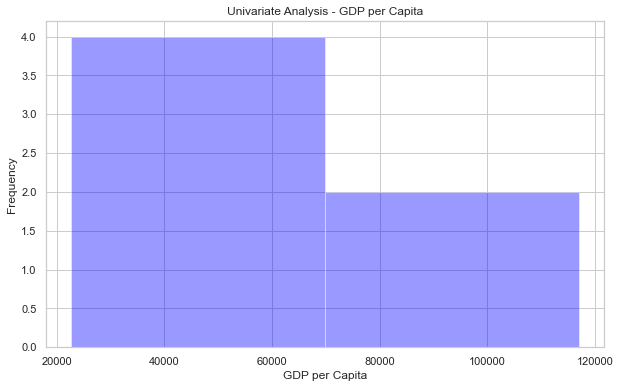

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot
plt.figure(figsize=(10, 6))
sns.distplot(df_groupby['gdp_per_capita'], kde=False, color='blue')
plt.title('Univariate Analysis - GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

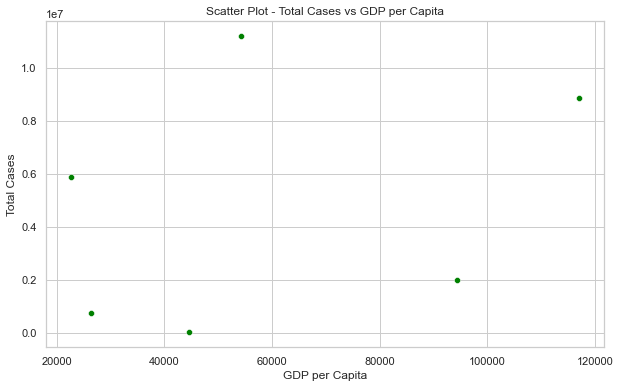

In [31]:
# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=df_groupby, color='green')
plt.title('Scatter Plot - Total Cases vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.show()

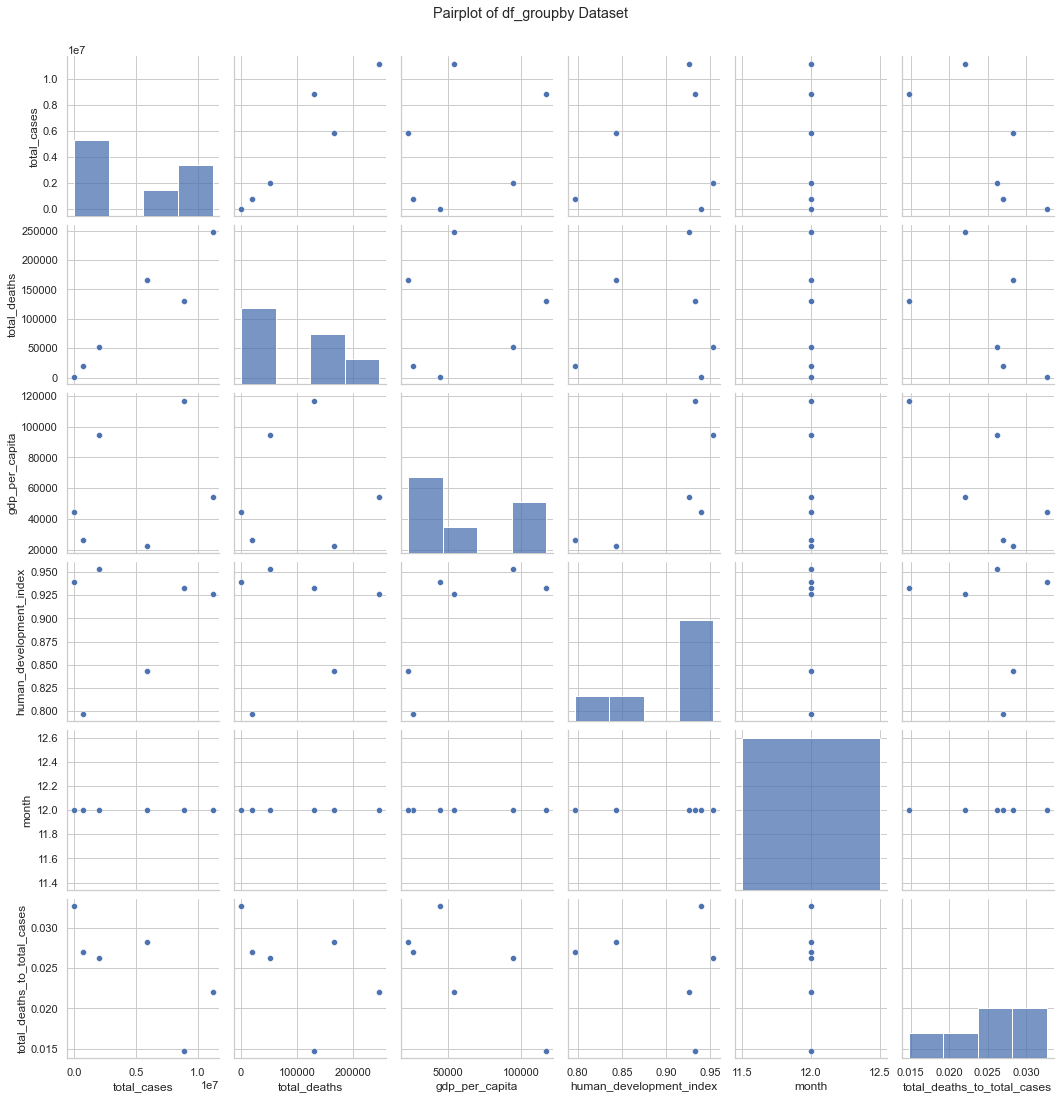

In [32]:
#c.Plot Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.suptitle('Pairplot of df_groupby Dataset', y=1.02)
plt.show()

<Figure size 864x432 with 0 Axes>

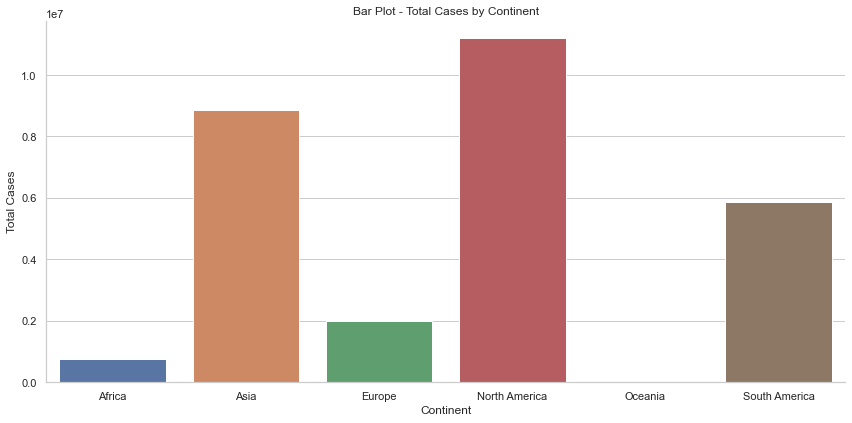

In [34]:
# d. Plot a bar plot of 'continent' column with 'total_cases'
plt.figure(figsize=(12, 6))
sns.catplot(x='continent', y='total_cases', kind='bar', data=df_groupby, height=6, aspect=2)
plt.title('Bar Plot - Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()